# <center> [INDICIUM] - Processo Seletivo - Lighthouse Programa de Formação em Dados (Remoto) </center>

# <center> Descrição Gráfica do Dados e Análise Descritiva </center>

In [1]:
#Import das libs necessárias no projeto
import pandas as pd
import seaborn as sn
import numpy as np 
import math
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pandasql import sqldf
from scipy import stats

In [2]:
#Ler os dados do csv e transformar em um dataframe para possibilitar a sua manipulação
df_treino = pd.read_csv("./desafio_manutencao_preditiva_treino.csv")
df_teste = pd.read_csv("./desafio_manutencao_preditiva_teste.csv")

### Parte I - Informações básicas sobre o dataset

Overview do dataset: O objetivo é analisar visualmente o tipo de dados e as colunas.

In [3]:
df_treino

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure
...,...,...,...,...,...,...,...,...,...
6662,9995,L57174,L,298.8,308.3,1634,27.9,12,No Failure
6663,9996,M24855,M,298.8,308.4,1604,29.5,14,No Failure
6664,9997,H39410,H,298.9,308.4,1632,31.8,17,No Failure
6665,9999,H39412,H,299.0,308.7,1408,48.5,25,No Failure


Ao usar a função Info() é mostrado é quantidade de dados e informações básicas em relação as colunas tais como o nome, o tipo de dado e a quantidade de nulos. Verifica-se que não há valores nulos e que o dataset é heterogênio em relação ao tipo de dado tendo em vista que tem valores inteiros, ponto flutuante e object (refere-se as colunas com dados categóricos: product_id, Type, failure_type).

In [4]:
#resumo de valores não nulos encontrados
print(df_treino.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   udi                    6667 non-null   int64  
 1   product_id             6667 non-null   object 
 2   type                   6667 non-null   object 
 3   air_temperature_k      6667 non-null   float64
 4   process_temperature_k  6667 non-null   float64
 5   rotational_speed_rpm   6667 non-null   int64  
 6   torque_nm              6667 non-null   float64
 7   tool_wear_min          6667 non-null   int64  
 8   failure_type           6667 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 468.9+ KB
None


### Estatisticas básicas em relação aos dados

a) Quantidade de Produto por tipo

Foi escolhido o gráfico de pizza, nesse caso ele pode ser utilizado por ter apenas três tipos de produto. Se houvesse mais categorias era indicado outro tipo de visualização para não ficar poluído.

Pelo gráfico abaixo percebe-se que a maior quantidade de tipo de produto é do tipo L com 59,3% dos dados, seguido do tipo M com 30,3% dos dados. 

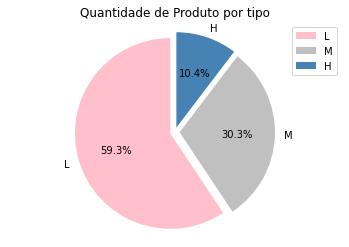

In [5]:
labels = ['L', 'M', 'H']
values = [df_teste['type'].value_counts()[0], df_teste['type'].value_counts()[1], df_teste['type'].value_counts()[2]]
colors = ['pink', 'silver', 'steelblue']
explode = (0.05, 0.05, 0.05)
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle = 90, explode=explode)
plt.title('Quantidade de Produto por tipo')
plt.axis('equal')
plt.legend()
plt.show()

In [6]:
df_treino['failure_type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

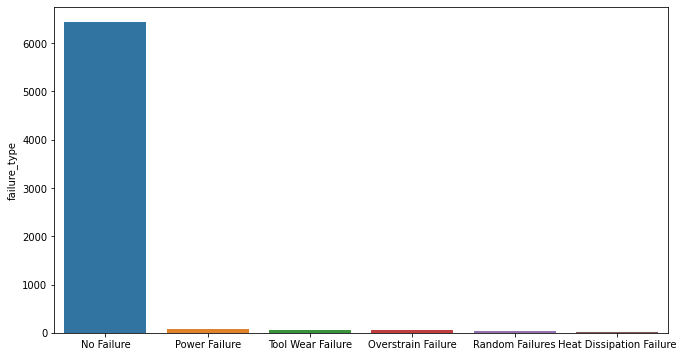

In [7]:
values = df_treino["failure_type"].value_counts()
labels = ["No Failure", 'Power Failure', 'Tool Wear Failure', 'Overstrain Failure',
         'Random Failures', 'Heat Dissipation Failure']

plt.figure(figsize=(11, 6))

sn.barplot(x = labels,
            y = values)
 
# Show the plot
plt.show()

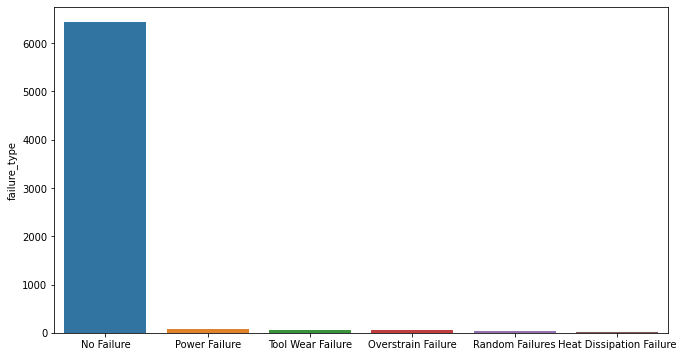

In [8]:
labels = ["No Failure", 'Power Failure', 'Tool Wear Failure', 'Overstrain Failure',
         'Random Failures', 'Heat Dissipation Failure']

plt.figure(figsize=(11, 6))

sn.barplot(x = labels,
            y = values)
 
# Show the plot
plt.show()

### Parte II - Exploratory Data Analysis (EDA)

**Ao utilizar a função info() verifica-se que nemhuma das colunas tem valor nulo. Com isso, não será necessário nemhum tratamento para dados faltantes.**

In [9]:
df_teste.describe()

,udi,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,5012.321932,300.029763,310.031443,1541.489649,39.843684,107.656766
std,2868.740345,2.011382,1.474842,183.411680,10.005058,64.247195
min,3.000000,295.300000,305.700000,1202.000000,4.600000,0.000000
25%,2515.000000,298.400000,308.900000,1425.000000,33.100000,51.000000
50%,5023.000000,300.100000,310.100000,1503.000000,39.900000,108.000000
75%,7470.000000,301.600000,311.100000,1612.000000,46.600000,163.000000
max,9998.000000,304.400000,313.800000,2861.000000,70.000000,253.000000


O próximo passo foi utilizar a função describe() para descrever as principais estatisticas básicas em relação ao Dataset. Com isso temos as seguintes informações: 

1. Count:
2. Mean: 
3. Std:
4. 25%: 
5. 50%: 
6. 75%: 
7. Max: 

1) As primeiras estatisticas a serem discritas são as Medidas de Tendência Central: Média, Mediana e Moda que tem por objetivo definir os valores centrais do conjunto de dados e permitir que outros dados sejam comparados a essas estatisticas, podendo assim, determinar a dispersão ou distribuição da base de dados 

As colunas aos quais foram calculadas foram: air_temperature_k, process_temperature_k, torque_nm

In [10]:
df_teste.head()

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
0,446,L47625,L,297.5,308.6,1793,26.7,70
1,7076,L54255,L,300.7,310.5,1536,47.4,192
2,1191,L48370,L,297.2,308.4,1460,42.1,41
3,2618,L49797,L,299.4,309.1,1670,35.9,68
4,5067,L52246,L,304.1,313.1,1550,30.9,9


/home/dani/anaconda3/envs/env_deep/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dani/anaconda3/envs/env_deep/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='process_temperature_k', ylabel='Density'>

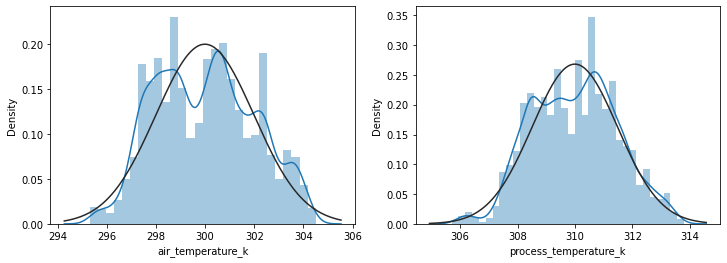

In [11]:
fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sn.distplot(df_treino['air_temperature_k'], ax=ax[0], fit=stats.norm)
sn.distplot(df_treino['process_temperature_k'], ax=ax[1], fit=stats.norm)

/home/dani/anaconda3/envs/env_deep/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dani/anaconda3/envs/env_deep/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rotational_speed_rpm', ylabel='Density'>

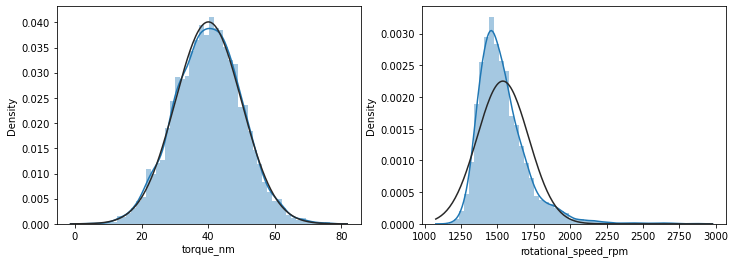

In [12]:
fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sn.distplot(df_treino['torque_nm'], ax=ax[0], fit=stats.norm)
sn.distplot(df_treino['rotational_speed_rpm'], ax=ax[1], fit=stats.norm)

Gráfico de dispersão para analisar se existe uma relação entre causa e efeito entre duas variáveis numéricas.

A relação entre duas variáveis pode ser positiva, negativa ou neutra, linear ou não linear.

O gráfico de dispersão não mostra apenas o valor individualmente, mas mostra os dados como um todo. Sendo útil para identificar outro padrões nos dados, como outlier (pontos extremos) ou possíveis grupos entre os dados.

https://medium.com/@joaolggross/visualiza%C3%A7%C3%A3o-de-dados-em-python-parte-1-gr%C3%A1ficos-de-dispers%C3%A3o-e-distribui%C3%A7%C3%A3o-com-seaborn-c8636f0202b1

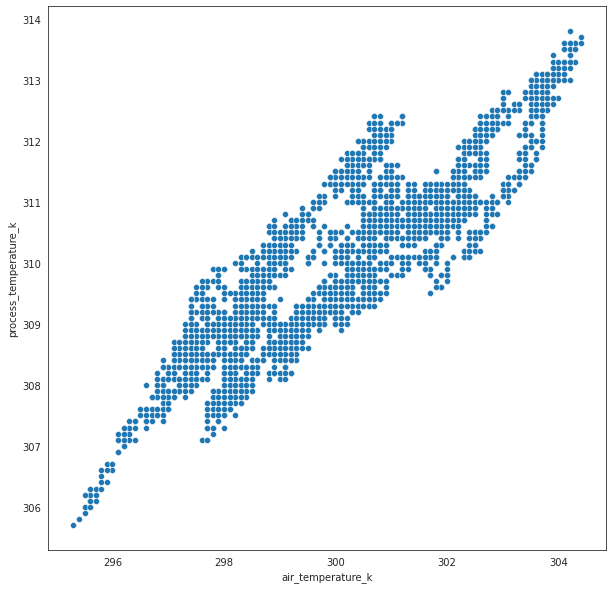

In [13]:
# Criando o ambiente do gráfico 
sn.set_style("white")
plt.figure(figsize=(10, 10))

# Gráfico de Dispersão
g = sn.scatterplot(x="air_temperature_k", y="process_temperature_k", data=df_teste)
plt.show()

<AxesSubplot:xlabel='type', ylabel='air_temperature_k'>

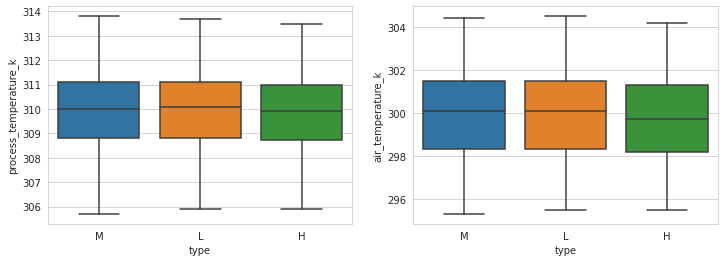

In [14]:
sn.set_style("whitegrid")
fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sn.boxplot(x = df_treino['type'], y = df_treino['process_temperature_k'], data = df_treino, ax=ax[0])
sn.boxplot(x = df_treino['type'], y = df_treino['air_temperature_k'], data = df_treino, ax=ax[1])

<AxesSubplot:xlabel='type', ylabel='torque_nm'>

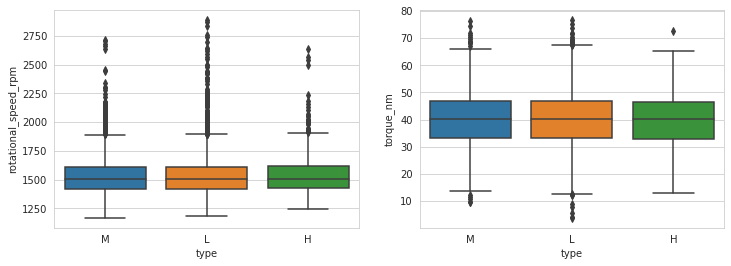

In [15]:
sn.set_style("whitegrid")
fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sn.boxplot(x = df_treino['type'], y = df_treino['rotational_speed_rpm'], data = df_treino, ax=ax[0])
sn.boxplot(x = df_treino['type'], y = df_treino['torque_nm'], data = df_treino, ax=ax[1])

### Correlação entre os dados ###

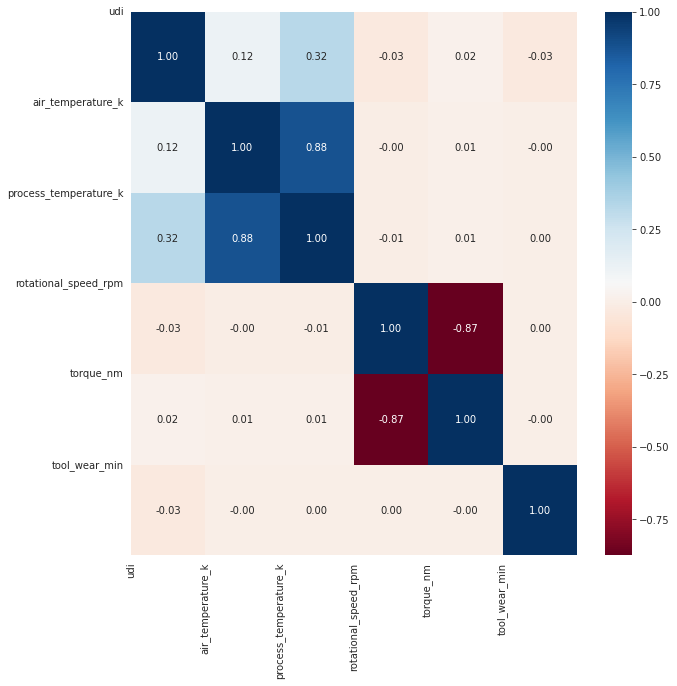

In [16]:
corr = df_teste.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sn.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

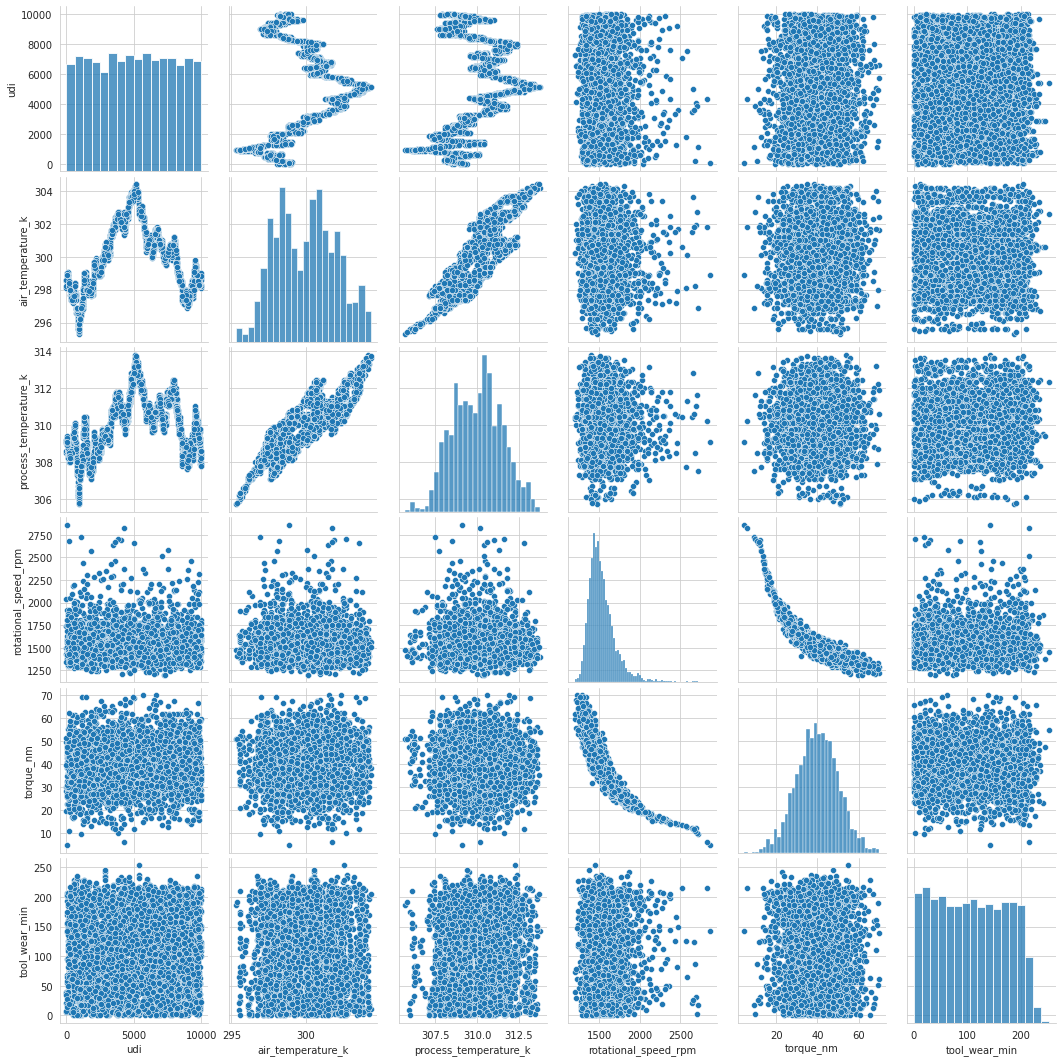

In [17]:
sn.pairplot(df_teste)
plt.show()

https://www.kaggle.com/code/tolgahancepel/boston-housing-regression-analysis

https://www.kaggle.com/code/anthonypino/price-analysis-and-linear-regression

### Condições de Falha

1. Tool wear failure (TWF): A ferramenta será substituída por falha quando tool wear [min] for 200 - 240 minutos. 

In [18]:
pysqldf = lambda q: sqldf(q, globals())
falha_1= pysqldf("SELECT * FROM df_teste where tool_wear_min BETWEEN 200 AND 240 order by tool_wear_min")

In [19]:
falha_1 = df_teste[df_teste['tool_wear_min'].between(200, 240)]
falha_1

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
53,8607,M23466,M,297.5,308.4,1505,37.2,215
87,589,L47768,L,297.6,309.4,1628,33.4,229
92,4467,L51646,L,302.8,310.6,1470,41.1,205
94,6584,M21443,M,301.5,310.5,1503,38.2,200
107,2850,L50029,L,300.4,309.3,1766,28.2,207
...,...,...,...,...,...,...,...,...
3319,6760,L53939,L,301.7,311.0,1441,44.3,208
3320,1683,H31096,H,297.9,307.4,1604,36.1,225
3323,5310,M20169,M,303.9,313.2,1422,48.0,215
3324,3866,H33279,H,302.6,311.5,1629,34.4,228


2. Heat dissipation failure (HDF): a dissipação de calor causa uma falha do processo, se a diferença entre a temperatura do ar e do processo for inferior a 8,6 K e a velocidade de rotação da ferramenta for inferior a 1380 rpm. Este é o caso de 115 pontos de dados.


In [20]:
cond_2 = ((df_teste['air_temperature_k'] - df_teste['process_temperature_k']) < 8.6) & (df_teste['rotational_speed_rpm']<1380)
df_teste[cond_2]

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
14,6984,M21843,M,300.7,311.0,1334,53.9,150
37,5531,M20390,M,302.3,311.8,1355,50.1,104
41,3779,M18638,M,302.4,311.1,1366,54.4,0
61,8329,L55508,L,298.6,309.5,1325,52.2,127
79,6951,H36364,H,300.7,311.3,1374,53.1,66
...,...,...,...,...,...,...,...,...
3307,9831,L57010,L,298.3,309.3,1337,56.1,206
3308,1335,L48514,L,299.0,310.4,1365,49.1,226
3310,1162,L48341,L,297.0,307.8,1316,61.2,200
3312,8847,M23706,M,297.4,308.8,1325,62.4,204
